In [52]:
import cv2 as cv
import numpy as np
import sys
from matplotlib import pyplot as plt
import math

In [ ]:
# 각도 구하기

def degree_cal(x1, y1, x2, y2, dist) :
    # calculate the x,y change between the points
    difference = complex(x2,y2) - complex(x1,y1) 

    # convert the difference to polar coordinates
    (distance, angle) = cmath.polar(difference) 

    #calculate a new x,y change based on the angle and desired distance
    displacement = cmath.rect(dist, angle) 

    # add the displacement to the start and end point
    xy3 = displacement + complex(x2,y2)  

    x3 = xy3.real
    y3 = xy3.imag

    return (x3,y3)




y2가 더 큼


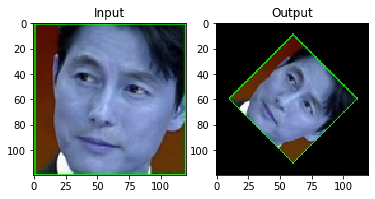

In [51]:
## 사진 수평 맞추기
file_name = "origin"
img = cv.imread("img/"+file_name+"_4.jpg")


faceCascade_eye = cv.CascadeClassifier('data/haarcascade_eye.xml') 
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY) 
eyes = faceCascade_eye.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5, minSize=(10, 10) ) 
for i in range(len(eyes)): 
    if i == 0 :
        x1, y1, w1, h1 = eyes[i]
    elif i == 1 :
        x2, y2, w2, h2 = eyes[i]
    else :
        pass

if y1 > y2 :
    print("y1이 더 큼")
elif y1 < y2 :
    print("y2가 더 큼")
elif y1 == y2 :
    pass
else :
    pass


# print(img)
rows,cols,ch = img.shape
 
pts1 = np.float32([[50,50],[200,50],[50,200]])
pts2 = np.float32([[10,100],[200,50],[100,250]])
 
# M = cv.getAffineTransform(pts1,pts2)
M = cv.getRotationMatrix2D((cols/2,rows/2), -45, 0.6)
dst = cv.warpAffine(img,M,(cols,rows))
 
plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()

In [45]:
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY) 

# Create the haar cascade
noseCascade = cv.CascadeClassifier("data/haarcascade_mcs_nose.xml")

nose = noseCascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5, minSize=(30, 30))
for i in range(len(nose)):
    ex, ey, ew, eh = nose[i]
    cv.rectangle(img,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

In [ ]:



cv.imshow("Nose found" ,img)
cv.waitKey(0) 
